In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import rcParams
from pandas.core.algorithms import value_counts_arraylike
import pydotplus
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')


# Load Dataset

In [ ]:
import os
import re
import os
import cv2
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
file_path = "/content/gdrive/MyDrive/AI Capstone/Model1/data/"
delete_missing_data = os.path.join(file_path, "Model 1 (delete UME Missing).csv")
replace_missing_data = os.path.join(file_path + "Model 1 (replace UME Missing).csv")

In [ ]:
data = pd.read_csv(delete_missing_data)
data.head()

,POLICY_NUMBER,UME_OVERALL_DECISION,Aggregator,sales channel,customer age range,gender,smoker,employment status,Occ class,collar type,...,IP_AppliedSum,IP_Ext_Replace,IP_Ext_Current,HE_AppliedSum,submission status,Replace Life,Replace TPD,Replace CI,Replace IP,Max Prod
0,1,refer,0,Health Connect,30 to 39,Male,Non-smoker,Employee (permanent or contractor),A3,WCO,...,11407,1,5743,0,Not Submitted,2,2,2,1,IP
1,2,refer,0,Health Connect,Under 30,Male,Non-smoker,Permanent employee (full or part time),A3,WCO,...,6761,2,0,250000,Submitted,1,2,2,2,IP
2,3,evidence required,1,Adviser,50 to 59,Female,Non-smoker,Permanent employee (full or part time),B2,BCL,...,0,2,0,0,Submitted,1,2,2,2,Life/CI
3,4,refer,0,Health Connect,40 to 49,Male,Non-smoker,Employee (permanent or contractor),A1,WCP,...,15058,1,12500,0,Not Submitted,1,1,2,1,IP
4,5,refer,0,Health Connect,40 to 49,Male,Non-smoker,Employee (permanent or contractor),A1,WCP,...,10000,1,5938,0,Not Submitted,1,1,1,1,IP


# Data Preprocessing

In [ ]:
# Drop unnecessary columns
columns = ['POLICY_NUMBER', 'InsH_CurrentTypes', 'Products']

data.drop(columns = columns, axis = 1, inplace = True)
data.head()

,UME_OVERALL_DECISION,Aggregator,sales channel,customer age range,gender,smoker,employment status,Occ class,collar type,Has limits,...,IP_AppliedSum,IP_Ext_Replace,IP_Ext_Current,HE_AppliedSum,submission status,Replace Life,Replace TPD,Replace CI,Replace IP,Max Prod
0,refer,0,Health Connect,30 to 39,Male,Non-smoker,Employee (permanent or contractor),A3,WCO,0,...,11407,1,5743,0,Not Submitted,2,2,2,1,IP
1,refer,0,Health Connect,Under 30,Male,Non-smoker,Permanent employee (full or part time),A3,WCO,0,...,6761,2,0,250000,Submitted,1,2,2,2,IP
2,evidence required,1,Adviser,50 to 59,Female,Non-smoker,Permanent employee (full or part time),B2,BCL,1,...,0,2,0,0,Submitted,1,2,2,2,Life/CI
3,refer,0,Health Connect,40 to 49,Male,Non-smoker,Employee (permanent or contractor),A1,WCP,1,...,15058,1,12500,0,Not Submitted,1,1,2,1,IP
4,refer,0,Health Connect,40 to 49,Male,Non-smoker,Employee (permanent or contractor),A1,WCP,0,...,10000,1,5938,0,Not Submitted,1,1,1,1,IP


In [ ]:
# Check out if an attribute contains null values
print(data.isnull().sum())

UME_OVERALL_DECISION    0
Aggregator              0
sales channel           0
customer age range      0
gender                  0
smoker                  0
employment status       1
Occ class               0
collar type             0
Has limits              0
Has Mental              0
Has Back                0
Has Existing Ins        0
LIFE_AppliedSum         0
LIFE_Ext_Replace        0
LIFE_Ext_Current        0
TPD_AppliedSum          0
TPD_Ext_Replace         0
TPD_Ext_Current         0
CI_AppliedSum           0
IP_AppliedSum           0
IP_Ext_Replace          0
IP_Ext_Current          0
HE_AppliedSum           0
submission status       0
Replace Life            0
Replace TPD             0
Replace CI              0
Replace IP              0
Max Prod                0
dtype: int64


In [ ]:
print(data.shape)

(7161, 30)


In [ ]:
# Fill missing values by using ffill method

data['employment status'].fillna(method = "ffill", inplace = True)
data['UME_OVERALL_DECISION'].fillna(method = "ffill", inplace = True)

In [ ]:
# convert all categorical attributes into numerical variables
categorical_attributes = ['sales channel', 'customer age range', 'gender', 'smoker', 'employment status', 
                          'Occ class', 'collar type', 'submission status', 'Max Prod']
for column in categorical_attributes:
  data[column] = LabelEncoder().fit_transform(data[column])

In [ ]:
# Convert target attribute 
mapping_dict = {'refer' : 1,
                'evidence required' : 2,
                'postpone' : 3,
                'non-standard' : 4,
                'standard' : 5,
                'decline' : 6}
after_mapping_target = data['UME_OVERALL_DECISION'].apply(lambda x : mapping_dict[x])
after_mapping_target

0       1
1       1
2       2
3       1
4       1
       ..
7156    5
7157    1
7158    1
7159    5
7160    1
Name: UME_OVERALL_DECISION, Length: 7161, dtype: int64

In [ ]:
print(data.columns)

Index(['UME_OVERALL_DECISION', 'Aggregator', 'sales channel',
       'customer age range', 'gender', 'smoker', 'employment status',
       'Occ class', 'collar type', 'Has limits', 'Has Mental', 'Has Back',
       'Has Existing Ins', 'LIFE_AppliedSum', 'LIFE_Ext_Replace',
       'LIFE_Ext_Current', 'TPD_AppliedSum', 'TPD_Ext_Replace',
       'TPD_Ext_Current', 'CI_AppliedSum', 'IP_AppliedSum', 'IP_Ext_Replace',
       'IP_Ext_Current', 'HE_AppliedSum', 'submission status', 'Replace Life',
       'Replace TPD', 'Replace CI', 'Replace IP', 'Max Prod'],
      dtype='object')


In [ ]:
print(data.dtypes)

UME_OVERALL_DECISION    object
Aggregator               int64
sales channel            int64
customer age range       int64
gender                   int64
smoker                   int64
employment status        int64
Occ class                int64
collar type              int64
Has limits               int64
Has Mental               int64
Has Back                 int64
Has Existing Ins         int64
LIFE_AppliedSum          int64
LIFE_Ext_Replace         int64
LIFE_Ext_Current         int64
TPD_AppliedSum           int64
TPD_Ext_Replace          int64
TPD_Ext_Current          int64
CI_AppliedSum            int64
IP_AppliedSum            int64
IP_Ext_Replace           int64
IP_Ext_Current           int64
HE_AppliedSum            int64
submission status        int64
Replace Life             int64
Replace TPD              int64
Replace CI               int64
Replace IP               int64
Max Prod                 int64
dtype: object


In [ ]:
print(data.isnull().sum())

UME_OVERALL_DECISION    0
Aggregator              0
sales channel           0
customer age range      0
gender                  0
smoker                  0
employment status       0
Occ class               0
collar type             0
Has limits              0
Has Mental              0
Has Back                0
Has Existing Ins        0
LIFE_AppliedSum         0
LIFE_Ext_Replace        0
LIFE_Ext_Current        0
TPD_AppliedSum          0
TPD_Ext_Replace         0
TPD_Ext_Current         0
CI_AppliedSum           0
IP_AppliedSum           0
IP_Ext_Replace          0
IP_Ext_Current          0
HE_AppliedSum           0
submission status       0
Replace Life            0
Replace TPD             0
Replace CI              0
Replace IP              0
Max Prod                0
dtype: int64


# Split dataset

In [ ]:
feature_columns = list(data.columns.difference(['UME_OVERALL_DECISION']))
X = data[feature_columns]
y = after_mapping_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5728, 29)
(1433, 29)
(5728,)
(1433,)


# Decision Tree

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree Accuracy: {0:.4f}'.format(accuracy))

Decision Tree Accuracy: 0.4431


In [ ]:
params = {
    "max_depth": [5, 7, 9, 11],
		"max_leaf_nodes": [300, 500, 1000],
    "min_samples_leaf": [10, 30, 50],
		"min_samples_split": [10, 30, 50],
		"criterion": ["gini", "entropy"]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV', grid_cv.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
GridSearchCV: 0.5660
GridSearchCV {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 300, 'min_samples_leaf': 30, 'min_samples_split': 10}


In [ ]:
dt_clf = DecisionTreeClassifier(random_state = 0, max_depth = 5, max_leaf_nodes = 300, min_samples_leaf = 30, 
                                min_samples_split = 10, criterion = 'gini')
dt_clf.fit(X_train, y_train)

print('Decision Tree Accuracy:', dt_clf.score(X_test, y_test))

Decision Tree Accuracy: 0.6008374040474529


In [ ]:
dt_pred = dt_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, dt_pred)

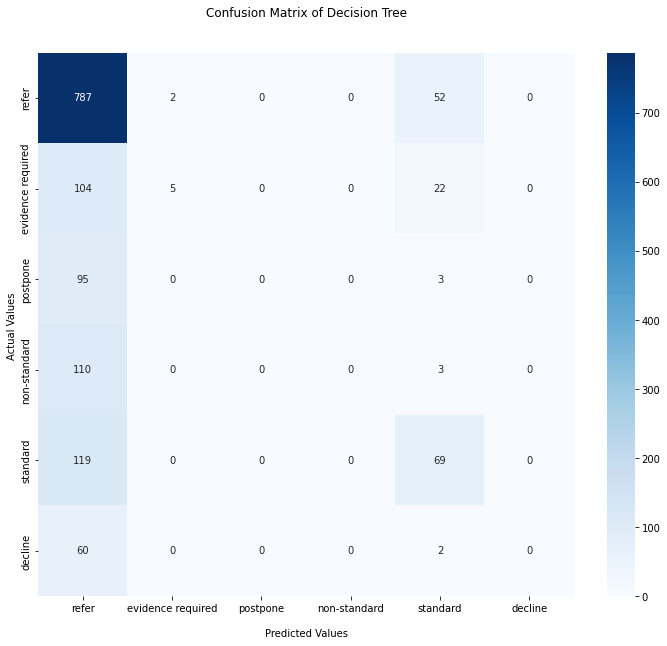

In [ ]:
# Visualize the confusion matrix

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Confusion Matrix of Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['refer','evidence required','postpone','non-standard','standard','decline'])
ax.yaxis.set_ticklabels(['refer','evidence required','postpone','non-standard','standard','decline'])

## Display the visualization of the Confusion Matrix.
plt.show()
plt.rcParams['figure.figsize'] = (12, 10)

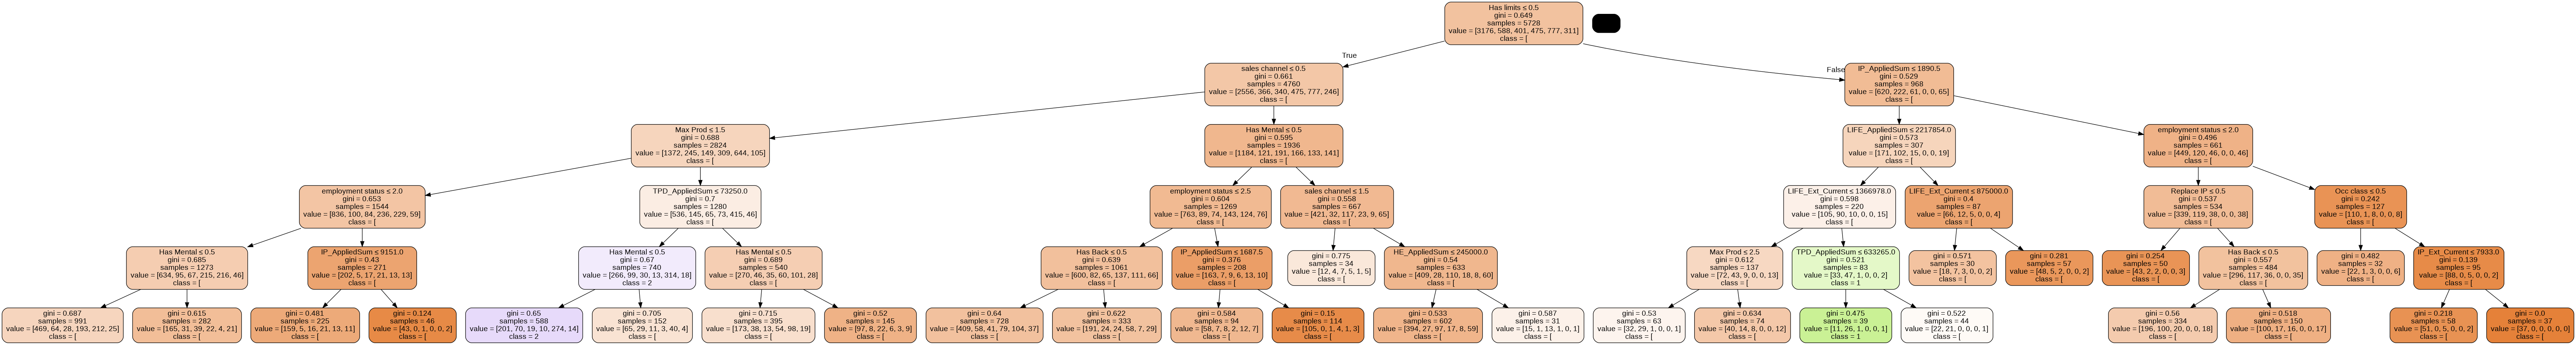

In [ ]:
# Decision Tree Visualization

x_list = list(X.columns)
y_list = list(y.drop_duplicates(inplace = False))

dot_data = export_graphviz(dt_clf, out_file = None, feature_names = x_list,
                          class_names = str(y_list), filled = True, rounded = True, special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

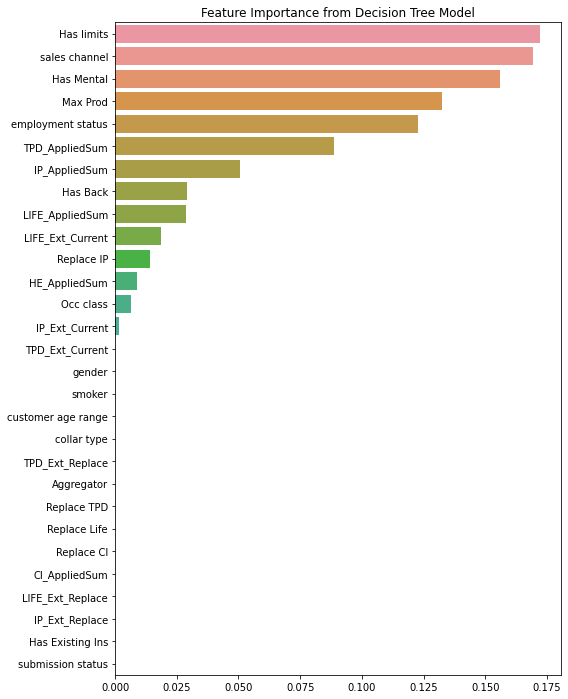

In [ ]:
# Feature importance chart
ftr_importances_values = dt_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_rank = ftr_importances.sort_values(ascending = False)

plt.figure(figsize = (8, 12))
plt.title('Feature Importance from Decision Tree Model')
sns.barplot(x = ftr_rank, y = ftr_rank.index)
plt.show()

# Gradient Boosting

In [ ]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

print("Training Accuracy:", gb_clf.score(X_train, y_train))
print("Testing Accuracy:", gb_clf.score(X_test, y_test))

Training Accuracy: 0.6232541899441341
Testing Accuracy: 0.5973482205163991


In [ ]:
# Hyperparameter Tuning

grid = {
    "learning_rate": [0.01, 0.05],
    "max_depth": [2, 3],
    "n_estimators": [200, 300, 400]
}

grid_cv = GridSearchCV(gb_clf, grid, cv = 5)
grid_cv.fit(X_train, y_train)
print("Best Parameters: ", grid_cv.best_params_)
print("Training Score: ", grid_cv.best_score_)
print("Testing Score: ", grid_cv.score(X_test, y_test))

Best Parameters:  {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 200}
Training Score:  0.5686092503257962
Testing Score:  0.6029309141660851


In [ ]:
gb_clf = GradientBoostingClassifier(random_state = 0, learning_rate = 0.05, 
                                    max_depth = 2, n_estimators = 200)
gb_clf.fit(X_train, y_train)

print("Training Accuracy:", gb_clf.score(X_train, y_train))
print("Testing Accuracy:", gb_clf.score(X_test, y_test))

Training Accuracy: 0.5822276536312849
Testing Accuracy: 0.6029309141660851


In [ ]:
gb_pred = gb_clf.predict(X_test)
confusion = confusion_matrix(y_test, gb_pred)

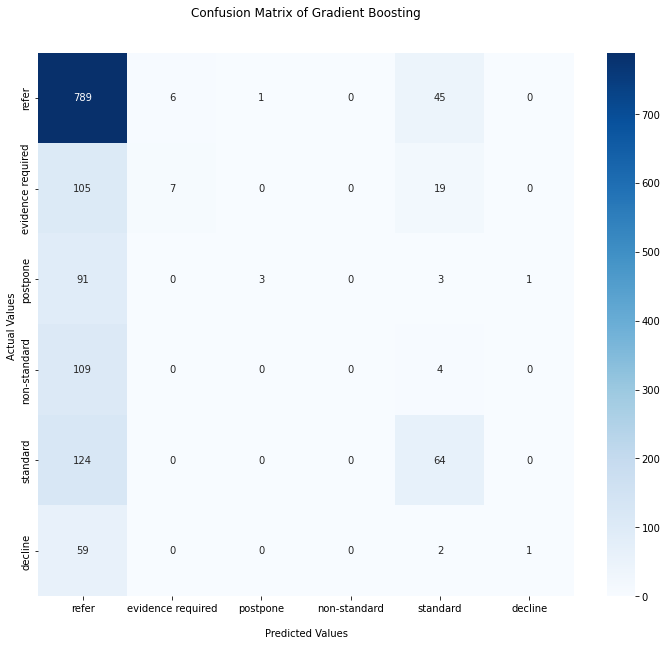

In [ ]:
# Visualize the confusion matrix

ax = sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g')

ax.set_title('Confusion Matrix of Gradient Boosting\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['refer','evidence required','postpone','non-standard','standard','decline'])
ax.yaxis.set_ticklabels(['refer','evidence required','postpone','non-standard','standard','decline'])

## Display the visualization of the Confusion Matrix.
plt.show()
plt.rcParams['figure.figsize'] = (12, 10)

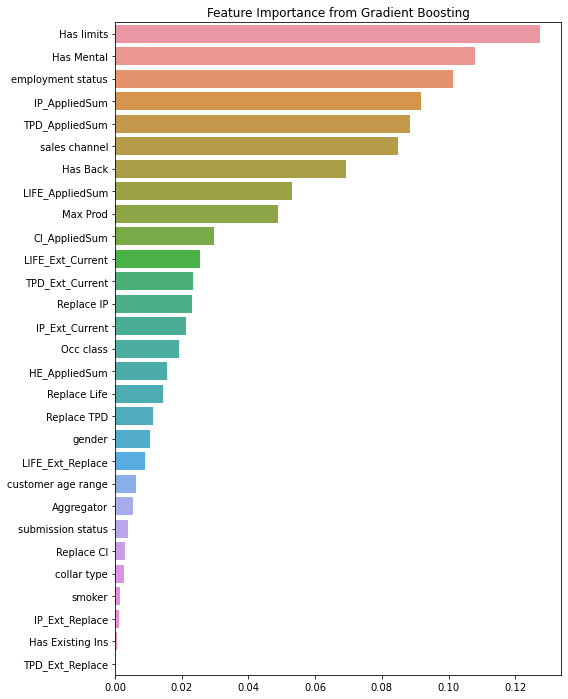

In [ ]:
ftr_importances_values = gb_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_rank = ftr_importances.sort_values(ascending = False)

plt.figure(figsize = (8, 12))
plt.title('Feature Importance from Gradient Boosting')
sns.barplot(x = ftr_rank, y = ftr_rank.index)
plt.show()